# Goals:
## -compare change of houing prices with change in imigrants
## -find out wether imigrants tend to buy newly built properties or existing properties


### Importing libraries


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import geopandas as gpd
import plotly.express as px
import numpy as np
import seaborn as sns
from shapely.ops import transform
import pyproj
import plotly.graph_objects as go
import geojson

### Setting up the table
 

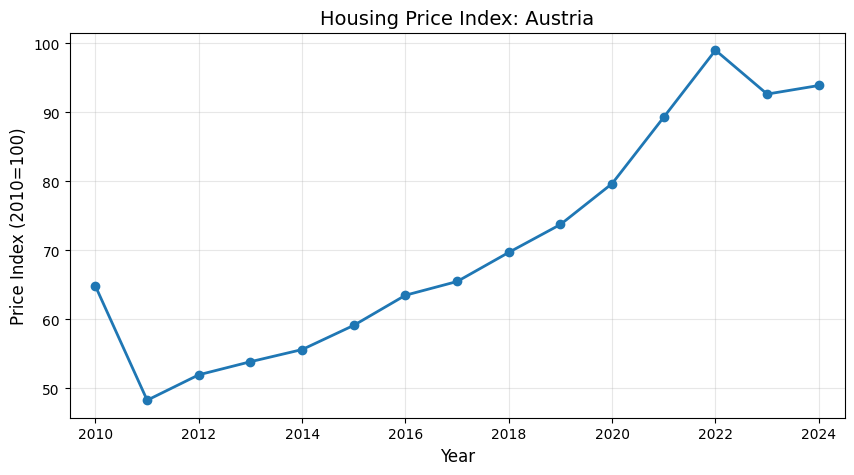

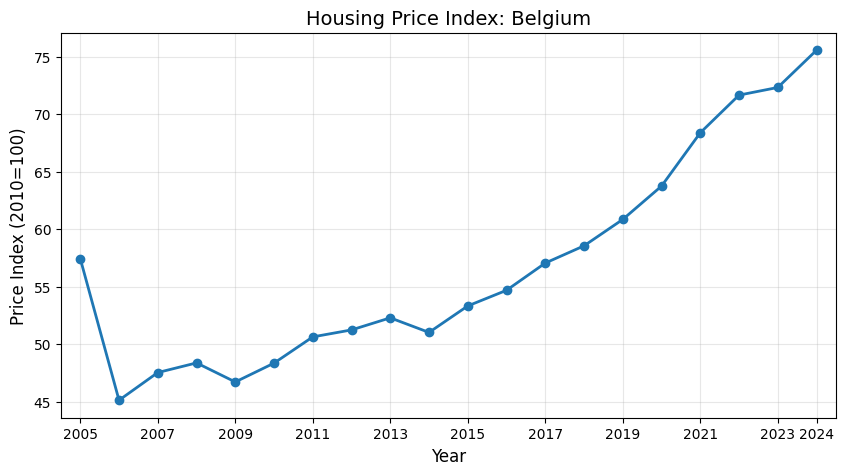

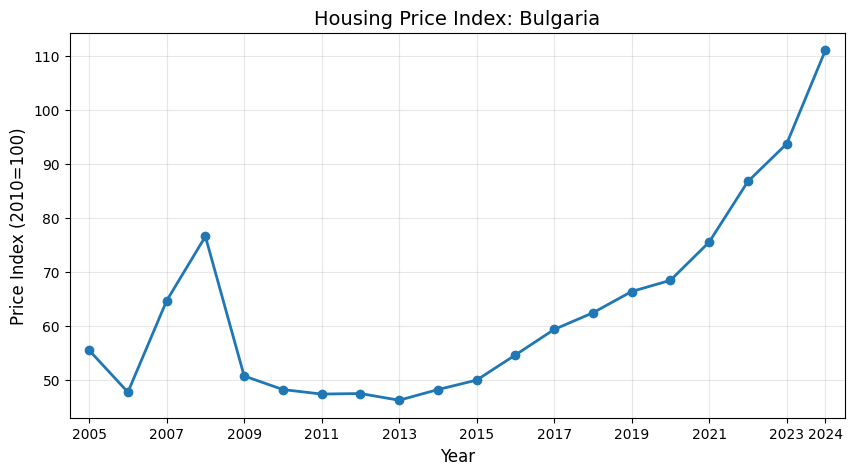

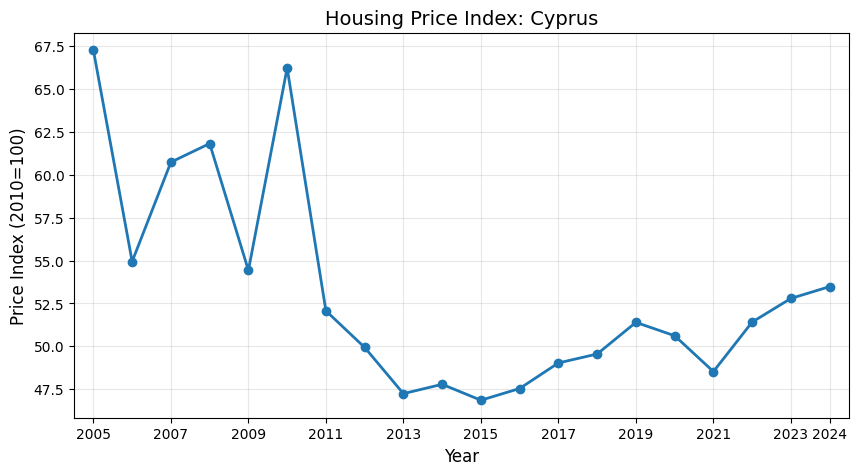

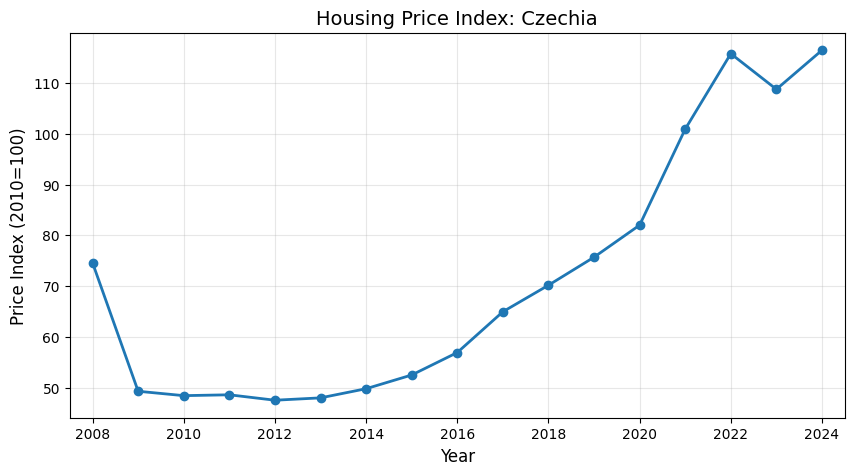

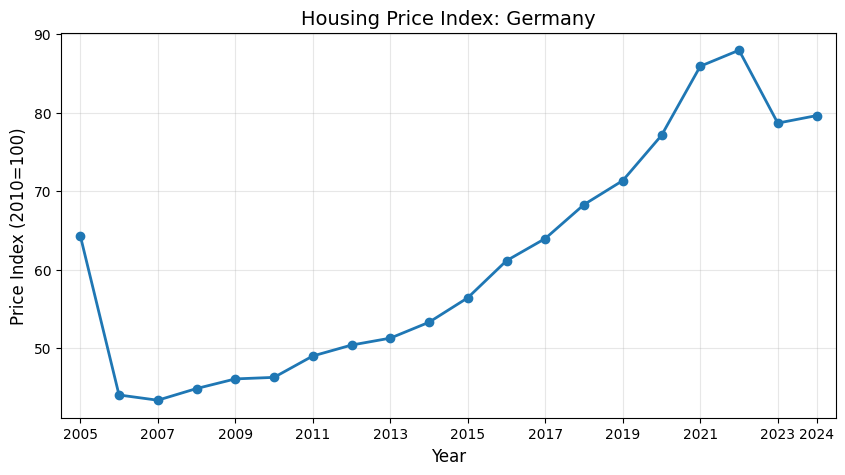

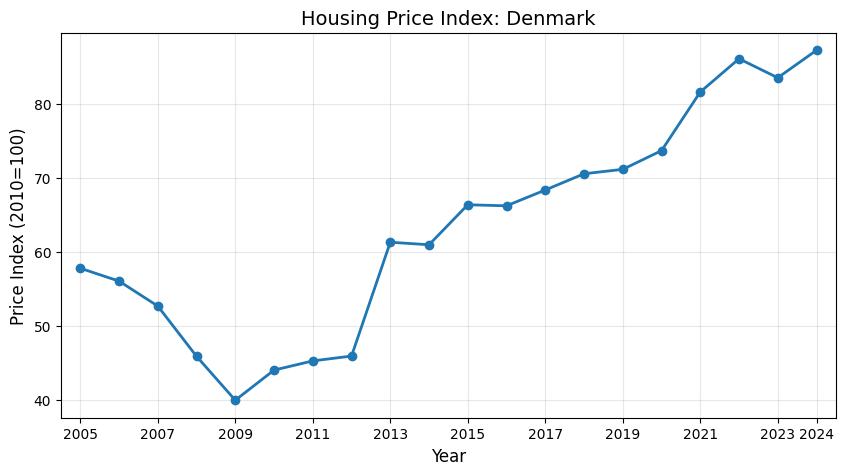

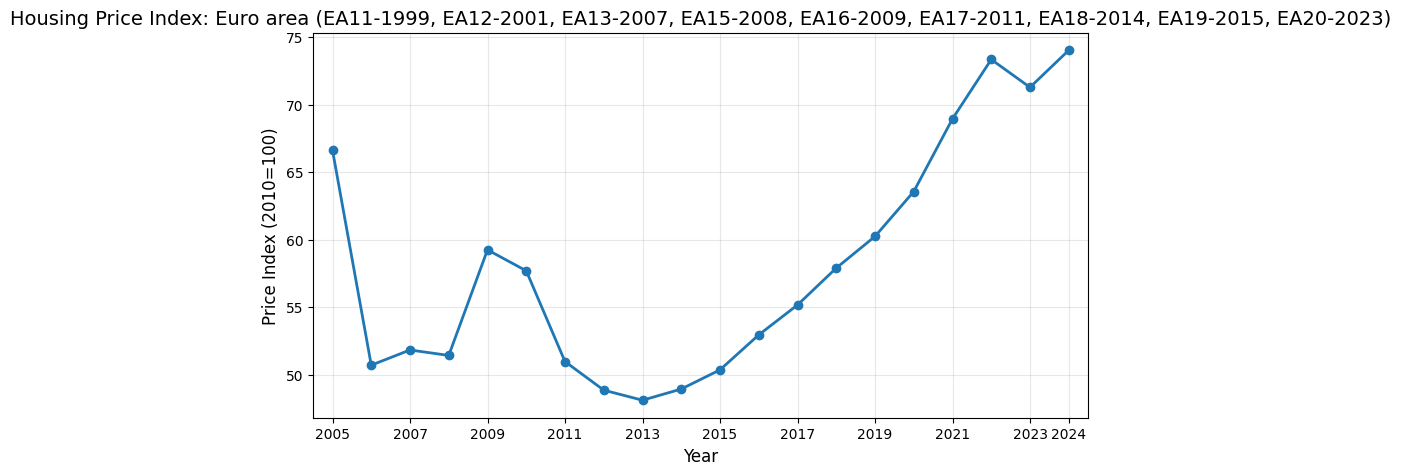

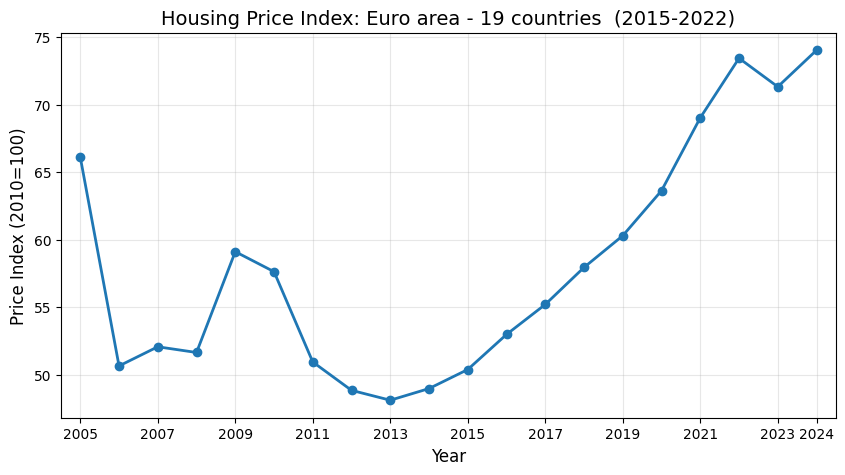

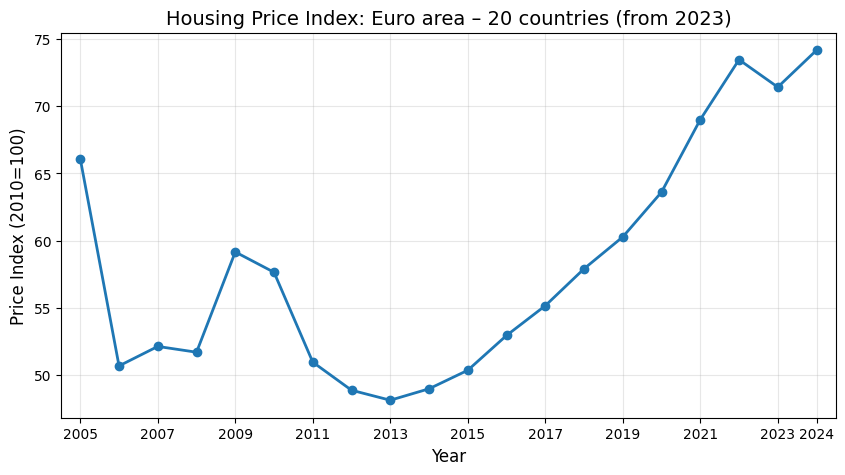

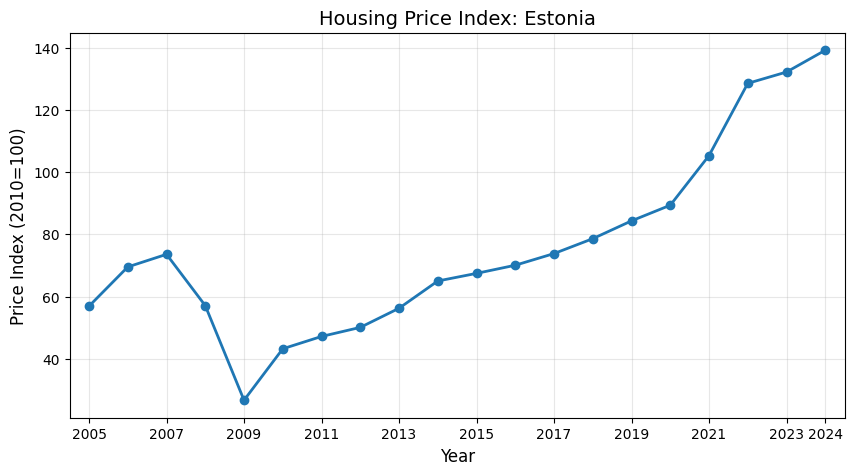

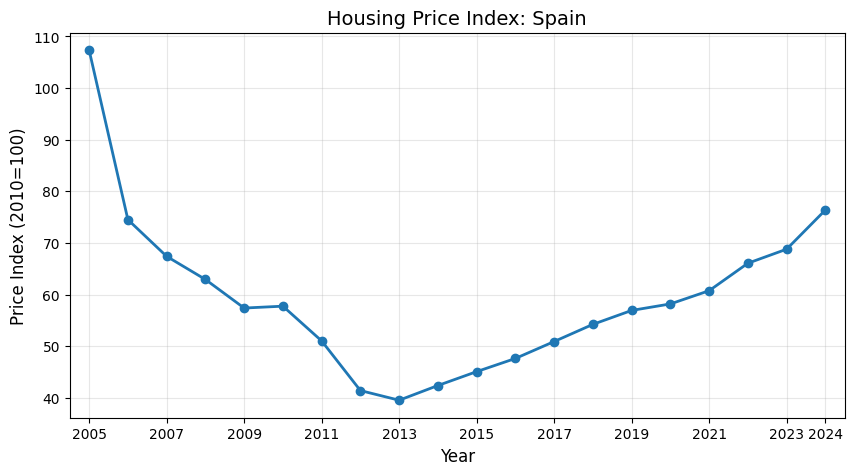

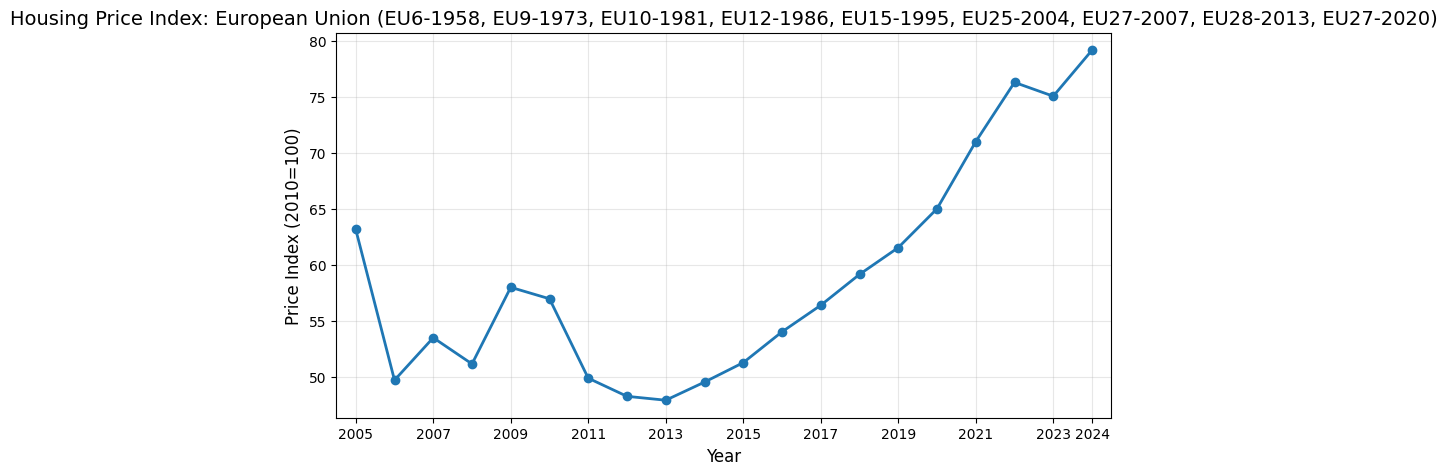

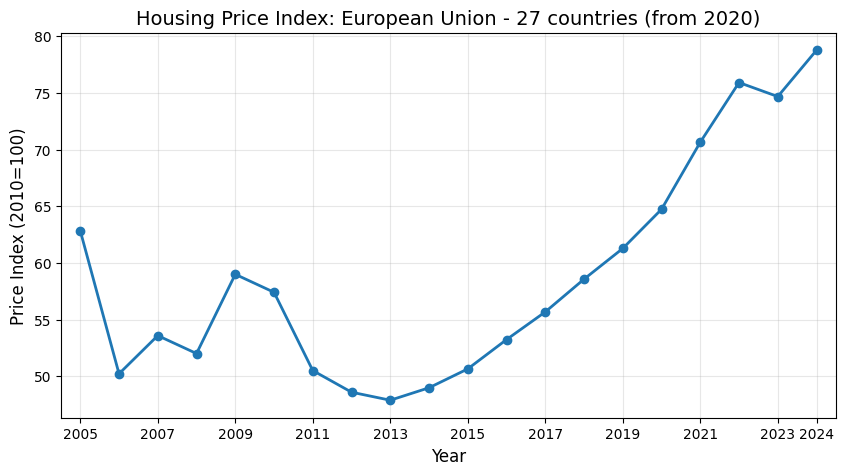

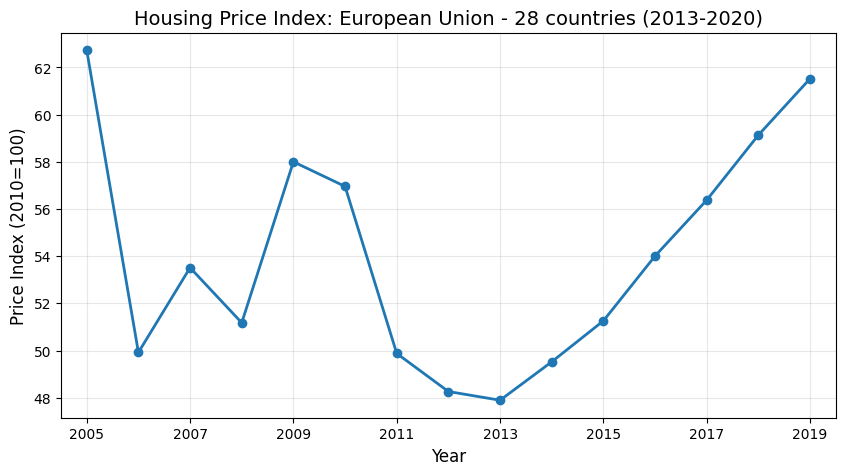

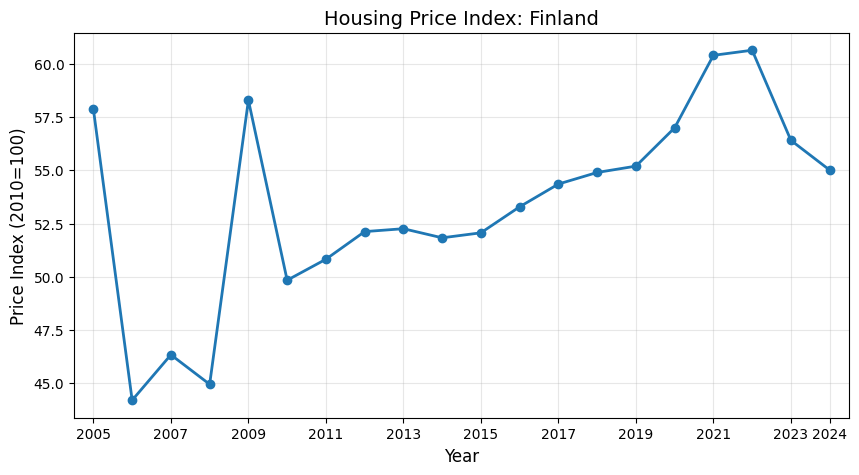

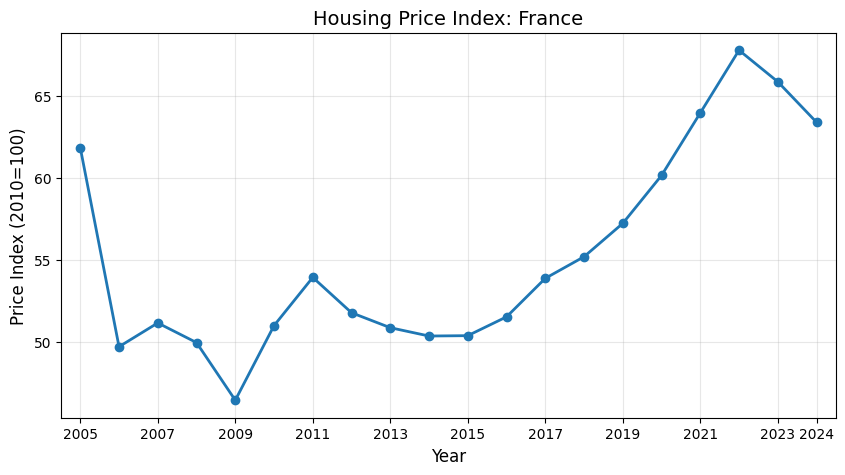

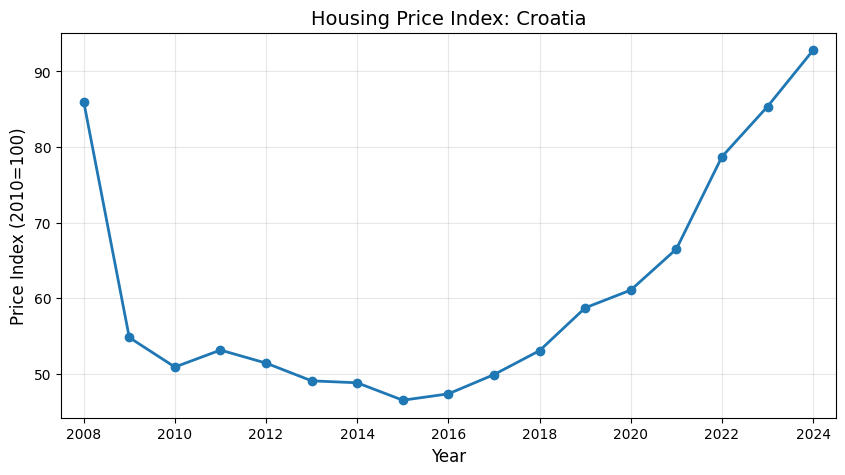

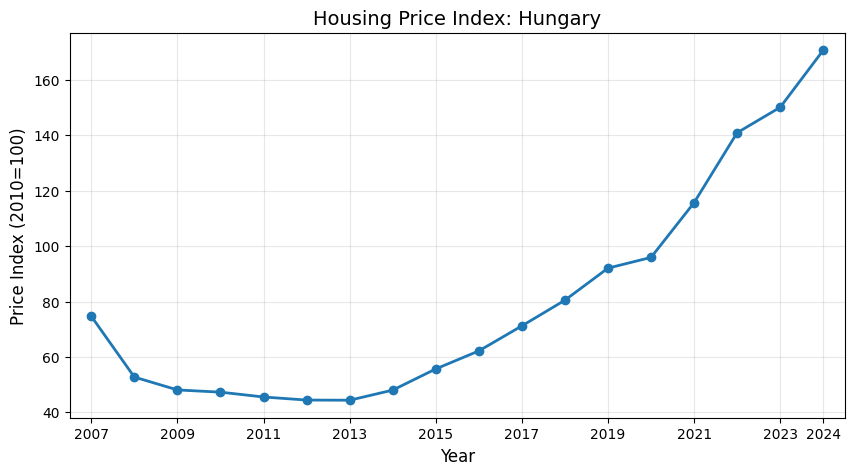

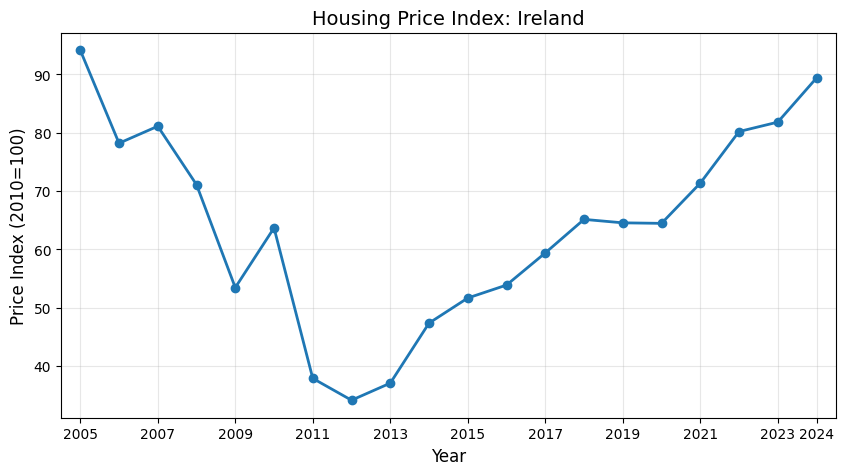

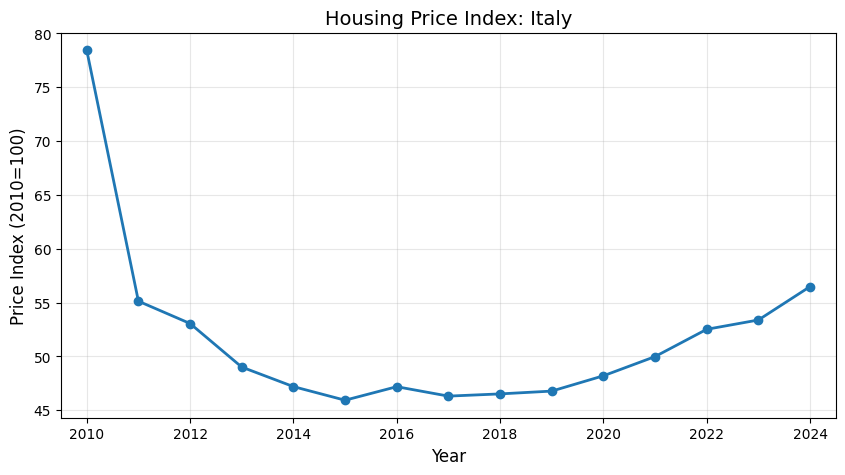

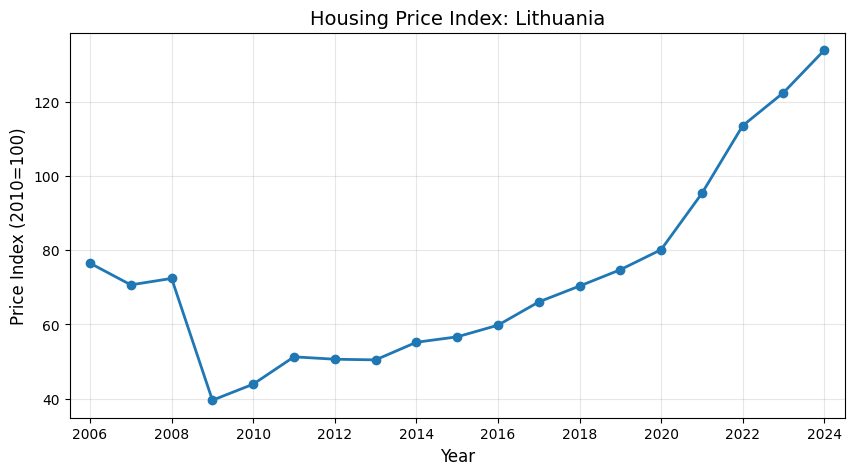

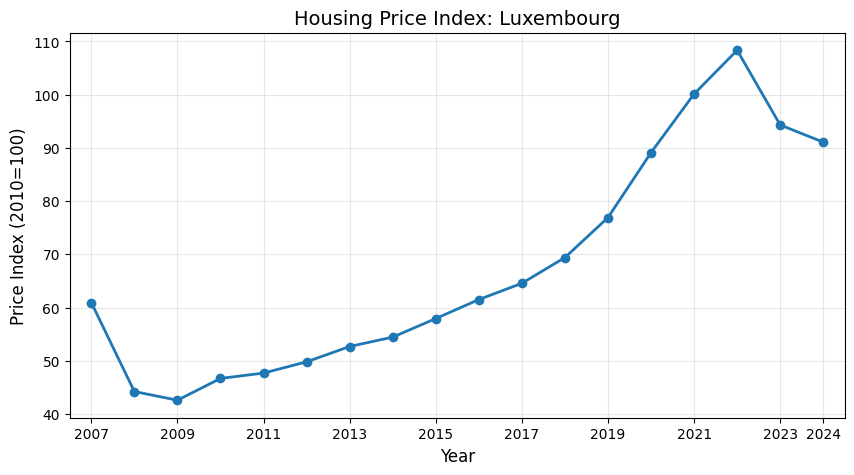

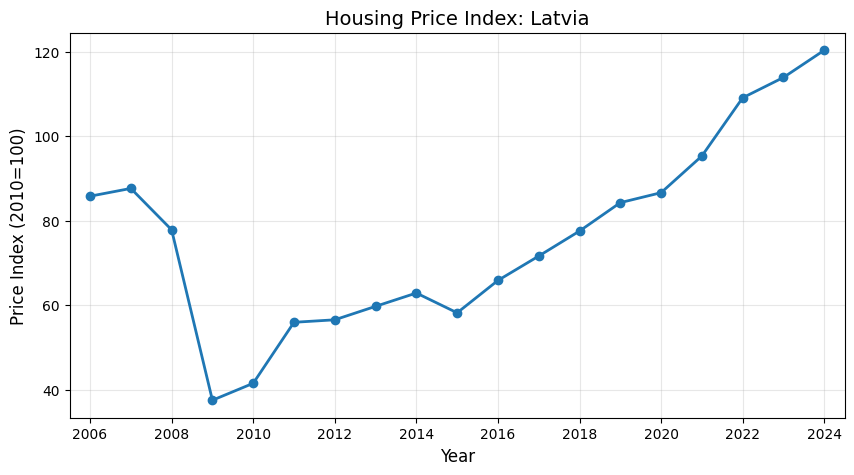

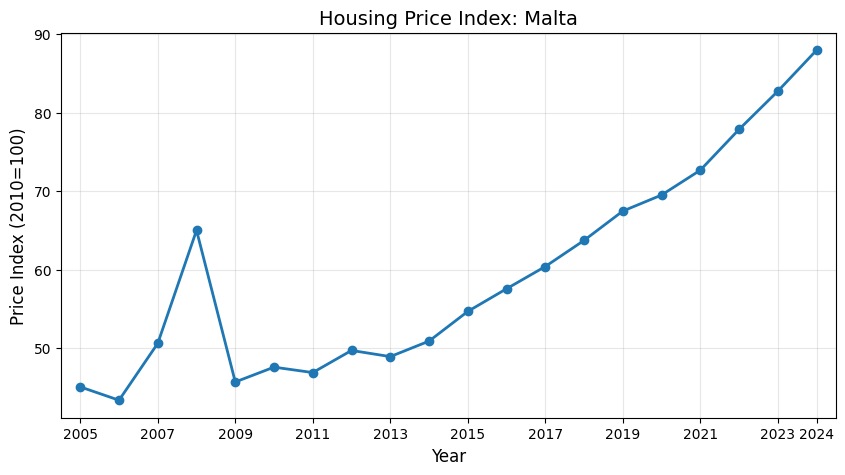

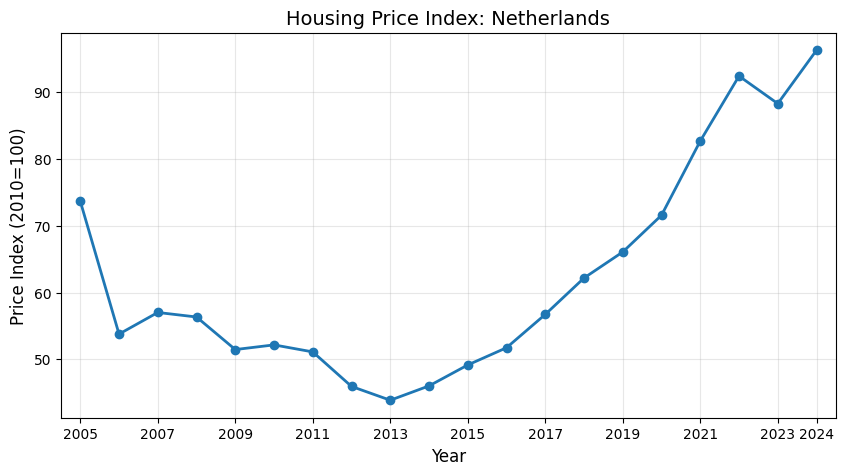

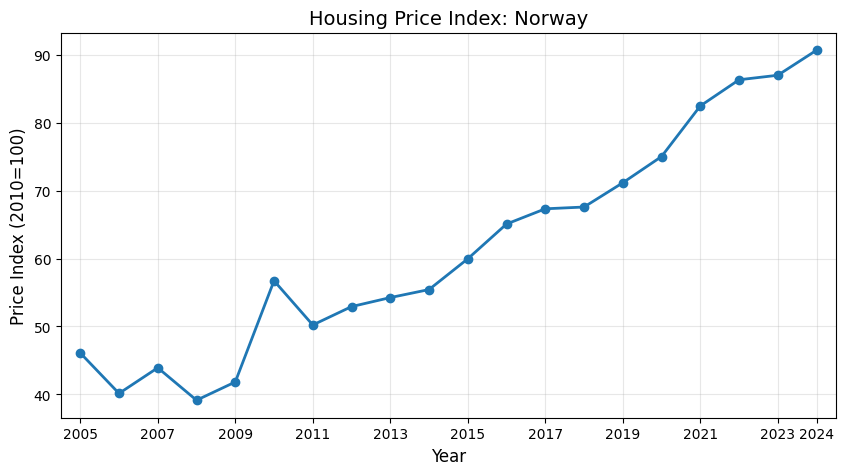

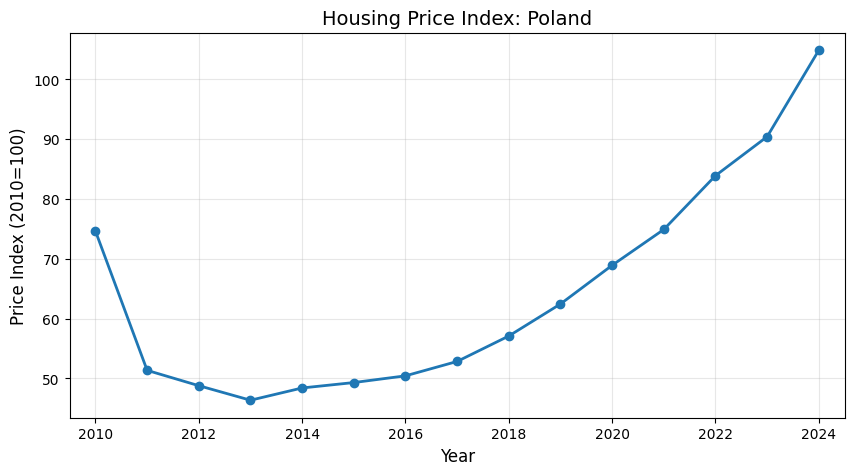

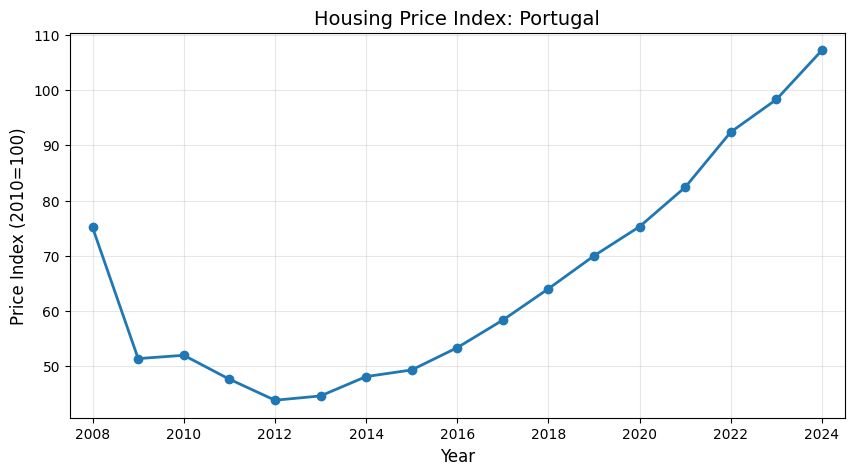

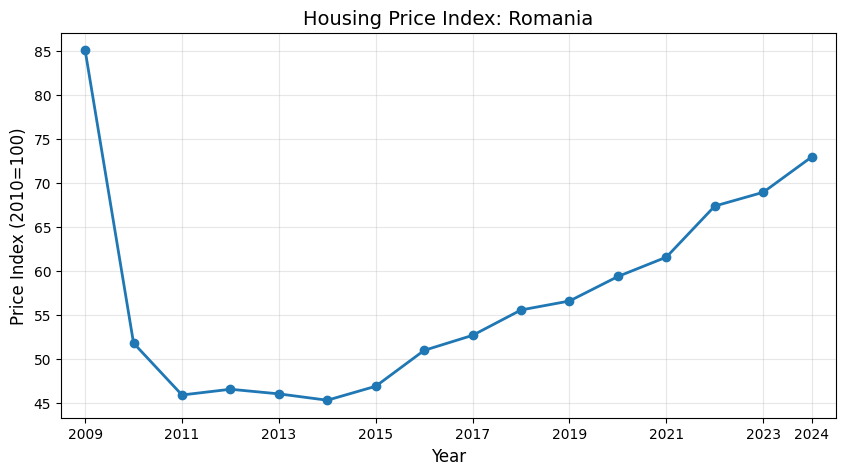

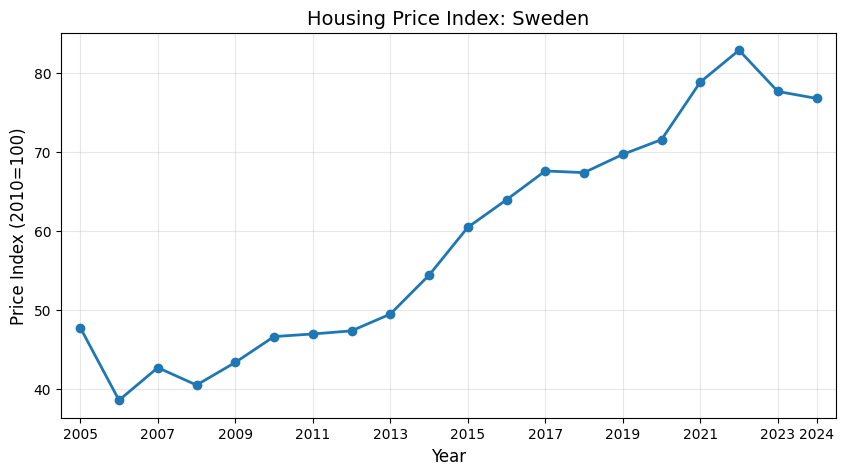

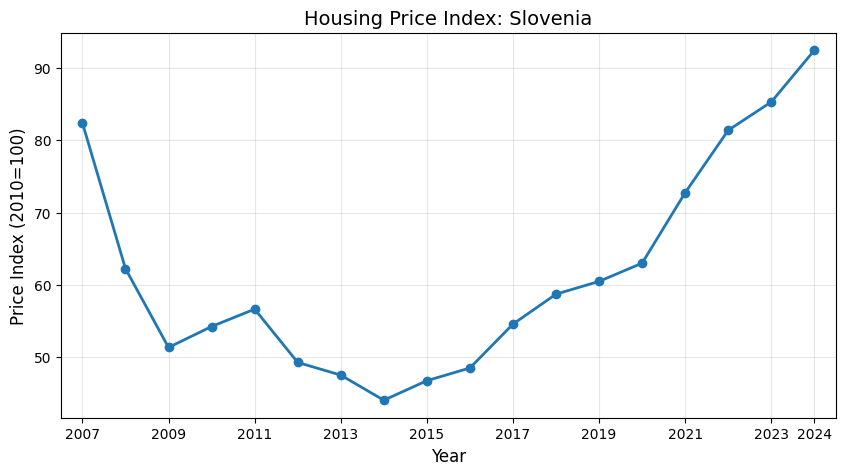

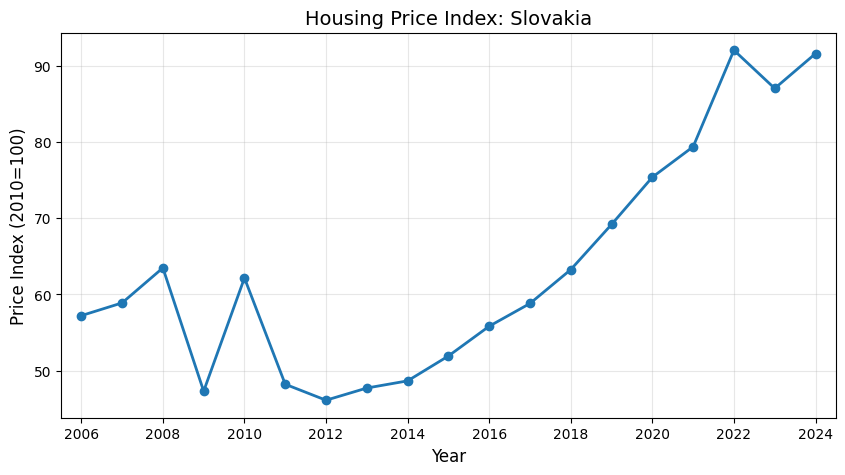

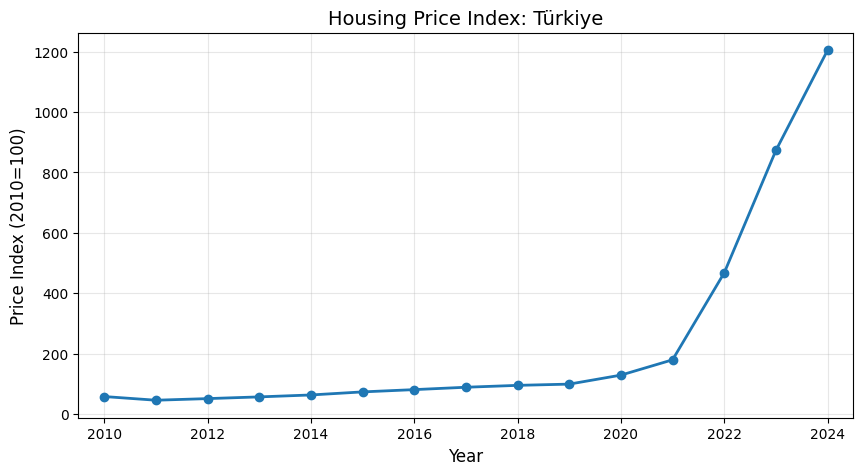

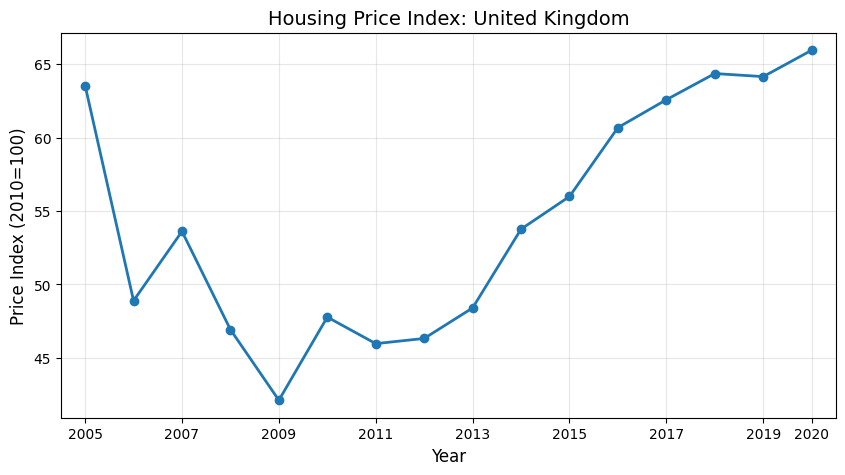

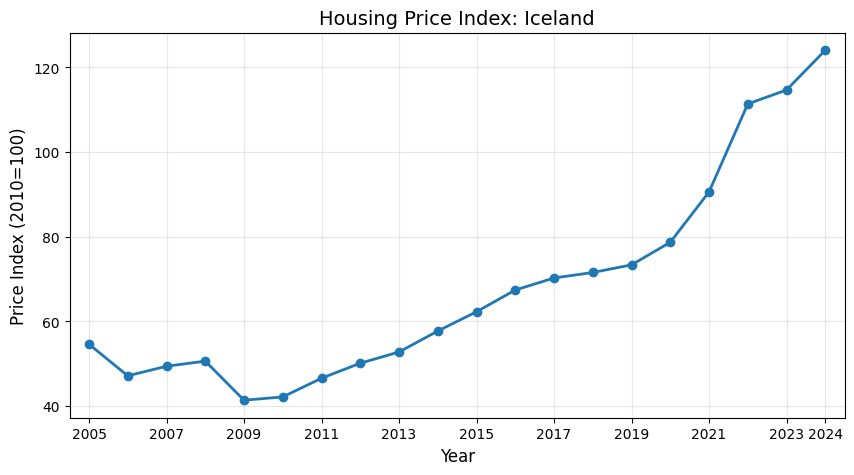

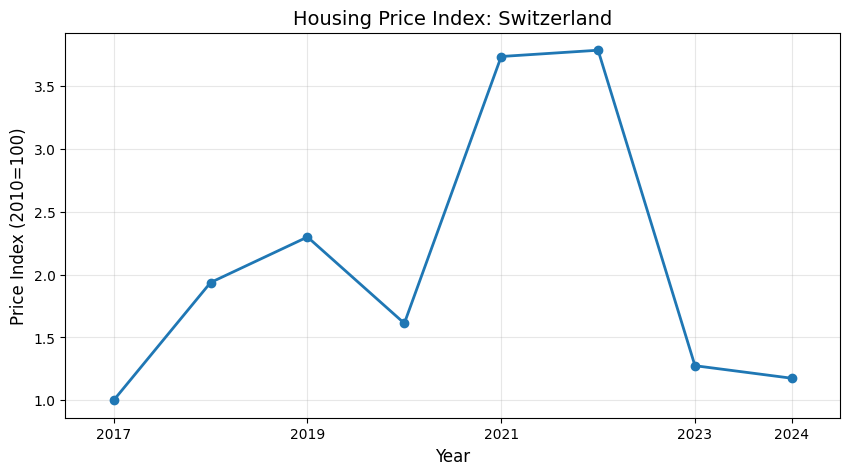

In [16]:
table = pd.read_csv("../Data/housing_prices.csv")
table = table.drop(columns=["DATAFLOW", "LAST UPDATE", "freq"])

table['Year'] = table['TIME_PERIOD'].str.split('-Q').str[0].astype(int)

table = table[(table['Year'] >= 2005) & (table['Year'] <= 2024)]

yearly_avg = table.groupby(['geo', 'Year'])['OBS_VALUE'].mean().reset_index()

for country in table['geo'].unique():
    country_data = yearly_avg[yearly_avg['geo'] == country]
    
    if country_data.empty:
        continue  
    
    min_year = country_data['Year'].min()
    max_year = country_data['Year'].max()
    year_range = max_year - min_year
    
    plt.figure(figsize=(10, 5))
    plt.plot(country_data['Year'], 
             country_data['OBS_VALUE'], 
             marker='o', 
             linestyle='-', 
             linewidth=2)  
    
    plt.xlim(min_year - 0.5, max_year + 0.5)
    
    if year_range <= 5: 
        step = 1
    else:  
        step = 2
    
    xticks = list(range(min_year, max_year + 1, step))
    if xticks[-1] != max_year: 
        xticks.append(max_year)
    
    plt.xticks(xticks)
    plt.title(f'Housing Price Index: {country}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Price Index (2010=100)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.show()